In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
real_artworks_df = pd.read_csv("artworks_with_prices_v3.csv")
generated_artworks_df = pd.read_csv("output_prices.csv")

In [3]:
artists = list(generated_artworks_df.artist)
averages_real = []
averages_generated = []
for artist in artists:
    prices_real = list(real_artworks_df[real_artworks_df.artist_name == artist].price)
    prices_generated = list(generated_artworks_df[generated_artworks_df.artist == artist].price)
    averages_real.append(sum(prices_real)/len(prices_real))
    averages_generated.append(sum(prices_generated)/len(prices_generated))

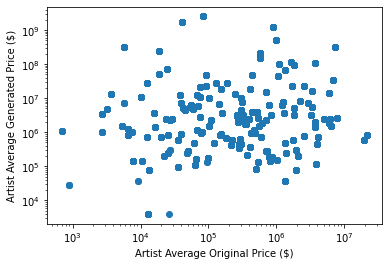

In [7]:
plt.scatter(averages_real, averages_generated)
plt.ylabel("Artist Average Generated Price ($)")
plt.xlabel("Artist Average Original Price ($)")
plt.yscale('log')
plt.xscale('log')

In [9]:
artworks = list(generated_artworks_df[generated_artworks_df.price > 5].source_artwork)
real_prices = []
generated_prices = []
for artwork in artworks:
    real_price = real_artworks_df[real_artworks_df.name == artwork].price
    if not real_price.isna().any() and len(real_price) == 1:
        real_prices.append(int(real_artworks_df[real_artworks_df.name == artwork].price))
        generated_prices.append(int(generated_artworks_df[generated_artworks_df.source_artwork == artwork].price))

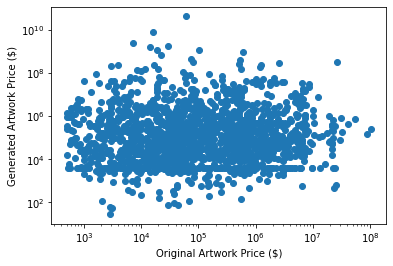

In [10]:
plt.scatter(real_prices[::2], generated_prices[::2])
plt.ylabel("Generated Artwork Price ($)")
plt.xlabel("Original Artwork Price ($)")
plt.yscale('log')
plt.xscale('log')